Fundos Imobiliarios(FIIs), são fundos de investimentos voltados para empreendimentos imobiliários como escritórios, agências, shoppings centers, galpões, dentre outros. São, em sua maioria, negociados em bolsa, facilitando o acesso de pessoas físicas aos principais empreendimentos imobiliários do Brasil com um baixo valor de entrada.

Disclaimer:

 Este Estudo sobre Fundos de Investimento Imobiliário (FIIs) é apenas para fins educacionais e informativos. As informações contidas neste estudo são fornecidas com o propósito de compartilhar conhecimento e facilitar o entendimento sobre o funcionamento e características dos FIIs. No entanto, ressaltamos que este estudo não deve ser interpretado como aconselhamento de investimento ou uma recomendação para comprar, vender ou manter cotas de FIIs.

Risco e Decisões Financeiras: O investimento em Fundos de Investimento Imobiliário envolve riscos e é importante realizar uma análise detalhada, considerando suas circunstâncias financeiras, objetivos e perfil de risco antes de tomar decisões de investimento. As informações apresentadas neste estudo podem não ser completas, precisas ou atualizadas, e não substituem a consulta a um profissional de finanças ou investimentos.

Aconselhamento Profissional: Recomendamos que você busque aconselhamento financeiro, jurídico e tributário de profissionais qualificados antes de tomar qualquer decisão de investimento. Cada investidor tem situações financeiras únicas, e é fundamental avaliar individualmente as informações apresentadas neste estudo à luz das suas próprias circunstâncias.

Variação do Mercado: Os preços das cotas de FIIs podem variar ao longo do tempo devido a fatores de mercado, econômicos e outros. Desempenho passado não é indicativo de resultados futuros.

Responsabilidade: O autor deste estudo não assume responsabilidade por quaisquer perdas, danos ou decisões tomadas com base nas informações contidas neste estudo. A decisão de investir em FIIs é de responsabilidade exclusiva do investidor.

Finalidade Educacional: Este estudo é destinado apenas para fins educacionais e informativos. Os leitores são encorajados a buscar fontes adicionais de informação e a se informar sobre os riscos e benefícios associados ao investimento em FIIs.

Lembre-se de que investir em FIIs envolve riscos e você deve sempre fazer sua própria pesquisa e buscar orientação profissional antes de tomar decisões financeiras.


___

Importando bibliotecas para inicio do estudo

In [1520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

In [1521]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

In [1522]:
servico = Service(ChromeDriverManager().install())

___

Realizando o Scrap

scrap realizado na pagina: https://www.fundsexplorer.com.br/

In [1523]:
# Configurações do Selenium
driver = webdriver.Chrome()
url_alvo = 'https://www.fundsexplorer.com.br/ranking'

In [1524]:
# Navega para a URL alvo
driver.get(url_alvo)

In [1525]:
try:
    table = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '/html/body/div[3]'))
    )
except Exception as e:
    print("A tabela não foi encontrada:", e)
    driver.quit()
    exit()

In [1526]:
# Obtém todas as linhas da tabela de fundos
linhas_tabela = table.find_elements(By.XPATH, './/tbody/tr')

# Lista para armazenar os dados
dados_fundos = []

In [1527]:
# Percorre as linhas e obtém os dados
for linha in linhas_tabela:
    colunas = linha.find_elements(By.TAG_NAME, 'td')
    if len(colunas) >= 27:
        fundos = colunas[0].text
        setor = colunas[1].text
        preço_atual = colunas[2].text
        liquidez_diaria = colunas[3].text
        pvp = colunas[4].text
        ultimo_dividendo = colunas[5].text
        dividendo_yield = colunas[6].text
        dy_3m_acumulado = colunas[7].text
        dy_6m_acumulado = colunas[8].text
        dy_12m_acumulado = colunas[9].text
        dy_3m_media = colunas[10].text
        dy_6m_media = colunas[11].text
        dy_12m_media = colunas[12].text
        dy_ano = colunas[13].text
        variacao_preco = colunas[14].text
        rentabilidade_periodo = colunas[15].text
        rentabilidade_acumulada = colunas[16].text
        patrimonio_liquido = colunas[17].text
        vpa = colunas[18].text
        pvpa = colunas[19].text
        dy_patrimonial = colunas[20].text
        variacao_patrimonial = colunas[21].text
        rentabilidade_patrimonio_periodo = colunas[22].text
        rentabilidade_patrimonio_acumulada = colunas[23].text
        vacancia_fisica = colunas[24].text
        vacancia_financeira = colunas[25].text
        quantidade_de_ativos = colunas[26].text


        dados_fundos.append([fundos, setor, preço_atual, liquidez_diaria, pvp, ultimo_dividendo, dividendo_yield, 
                             dy_3m_acumulado, dy_6m_acumulado, dy_12m_acumulado, dy_3m_media, dy_6m_media, dy_12m_media,
                             dy_ano, variacao_preco, rentabilidade_periodo, rentabilidade_acumulada, patrimonio_liquido, 
                             vpa, pvpa, dy_patrimonial, variacao_patrimonial, rentabilidade_patrimonio_periodo, 
                             rentabilidade_patrimonio_acumulada, vacancia_fisica, vacancia_financeira, quantidade_de_ativos])

In [1528]:

# Cria um DataFrame usando Pandas
df = pd.DataFrame(dados_fundos, columns=["Fundos", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", 
                                         "Ultimo Dividendo(R$)", "Dividend Yield", "DY (3M) Acumulado", "DY(6M) Acumulado",
                                         "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
                                         "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", 
                                         "VPA", "P/VPA", "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", 
                                         "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", "Quantidade de Ativos"])



# Finaliza o driver
driver.quit()

In [1529]:
data_atual = datetime.date.today().strftime('%Y-%B-%d')
hora_atual = datetime.datetime.now().strftime('%H:%M:%S')
print(f"Dados gerados em: {data_atual} at {hora_atual}.")


Dados gerados em: 2023-August-11 at 22:49:58.


___

In [1530]:
df.sample(10)

,Fundos,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,DY(12M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
384,XPSF11,FUNDO DE FUNDOS,"8,52","717.867,63","0,97","0,08","0,89 %","2,91 %","6,16 %","12,17 %",...,"378.160.463,54","8,54","1,00","0,90 %","-4,04 %","-3,18 %","-89,40 %",N/A,N/A,0
265,QIRI11,PAPÉIS,"78,04","6.867,57","0,87","89,64","0,00 %","1,84 %","3,81 %","8,24 %",...,"13.441.852,95","89,98","0,87","0,73 %","6,29 %","7,07 %","8,72 %",N/A,N/A,0
261,PRTS11,SHOPPINGS,"117,70",N/A,"1.961,67","0,05",N/A,N/A,N/A,N/A,...,"3.111.607,44",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2
209,LSPA11,PAPÉIS,"101,30","11.143,00","0,89","0,80","0,00 %","0,00 %","0,00 %","0,00 %",...,"46.256.811,82",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,0
59,BTWR11,FUNDO DE DESENVOLVIMENTO,"107,00","428,00","0,95","0,40","0,00 %","0,00 %","0,00 %","0,00 %",...,"91.109.610,90","111,90","0,96","0,38 %","0,23 %","0,61 %","7,24 %",N/A,N/A,1
298,RFOF11,FUNDO DE FUNDOS,"80,70","70.394,00","0,95","0,75","0,94 %","2,84 %","5,93 %","11,70 %",...,"90.246.354,50","80,55","1,00","0,91 %","-6,07 %","-5,22 %","1,08 %",N/A,N/A,0
319,SHOP11,SHOPPINGS,"68,00","192,67","1,43","6,75",N/A,N/A,N/A,N/A,...,"70.381.684,00",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1
180,JPPA11,PAPÉIS,"99,13","302.146,03","1,00","1,25","1,25 %","3,97 %","8,21 %","16,59 %",...,"89.729.539,93","99,04","1,00","1,41 %","-0,73 %","0,67 %","11,76 %",N/A,N/A,0
388,ZAVI11,INDEFINIDO,"127,43","230.158,43","0,93","1,12","0,88 %","2,67 %","5,24 %","7,88 %",...,"127.018.551,30",N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8
233,NCRA11,INDEFINIDO,"11,18","174.357,83","0,97","0,16","1,44 %","3,86 %","6,80 %","7,81 %",...,"43.087.632,24","10,56","1,06","0,97 %","0,00 %","0,00 %","0,00 %",N/A,N/A,0


In [1531]:
df.dtypes

Fundos                     object
Setor                      object
Preço Atual(R$)            object
Liquidez Diária(R$)        object
P/VP                       object
Ultimo Dividendo(R$)       object
Dividend Yield             object
DY (3M) Acumulado          object
DY(6M) Acumulado           object
DY(12M) Acumulado          object
DY(3M) Média               object
DY(6M) Média               object
DY(12M) Média              object
DY Ano                     object
Variação do Preço          object
Rentab. Período            object
Rentab. Acumulada          object
Patrimônio Líquido         object
VPA                        object
P/VPA                      object
DY Patrimonial             object
Variação Patrimonial       object
Rentab. Patr. Período      object
Rentab. Patr. Acumulada    object
Vacancia Física            object
Vacancia Financeira        object
Quantidade de Ativos       object
dtype: object

Converter os campos "object" para "numeric"

In [1532]:
df = df.replace('%', '', regex=True)
df = df.replace('\.', '', regex=True)
df = df.replace(',', '.', regex=True)

In [1533]:
df = df.replace('N/A', None)

In [1534]:
colunas_numericas = ["Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP", "Ultimo Dividendo(R$)", "Dividend Yield",
 "DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", 
 "DY Ano", "Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", 
 "DY Patrimonial", "Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Quantidade de Ativos"]
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)

Criar uma coluna chamada "Tipo" para agrupar os setores.

In [1535]:


# Definir as condições e valores correspondentes
condicoes = [
    (df['Setor'] == 'LAJES CORPORATIVAS')|(df['Setor'] == 'IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')|(df['Setor'] == 'SHOPPINGS')
    |(df['Setor'] == 'HOSPITALAR')|(df['Setor'] == 'IMÓVEIS COMERCIAIS - OUTROS')|(df['Setor'] == 'VAREJO')
    |(df['Setor'] == 'IMÓVEIS RESIDENCIAIS')|(df['Setor'] == 'AGÊNCIAS DE BANCOS')|(df['Setor'] == 'EDUCACIONAL')
    |(df['Setor'] == 'HOTÉIS'),    
    (df['Setor'] == 'PAPÉIS'),
    (df['Setor'] == 'FUNDO DE DESENVOLVIMENTO'),
    (df['Setor'] == 'MISTO'),
    (df['Setor'] == 'FUNDO DE FUNDOS'),
    (df['Setor'] == 'FIAGRO'),
    (df['Setor'] == 'INDEFINIDO')
]

valores = ['TIJOLO','PAPÉIS', 'FUNDO DE DESENVOLVIMENTO', 'HIBRIDO', 'FOF','FIAGRO', 'INDEFINIDO',]

# Criar uma nova coluna com base nas condições
df['Tipo'] = np.select(condicoes, valores, default='Outro')
df = df[["Fundos","Tipo", "Setor", "Preço Atual(R$)", "Liquidez Diária(R$)", "P/VP","Ultimo Dividendo(R$)", "Dividend Yield", 
"DY (3M) Acumulado", "DY(6M) Acumulado", "DY(12M) Acumulado", "DY(3M) Média", "DY(6M) Média", "DY(12M) Média", "DY Ano", 
"Variação do Preço", "Rentab. Período", "Rentab. Acumulada", "Patrimônio Líquido", "VPA", "P/VPA", "DY Patrimonial", 
"Variação Patrimonial", "Rentab. Patr. Período", "Rentab. Patr. Acumulada", "Vacancia Física", "Vacancia Financeira", 
"Quantidade de Ativos"]]


In [1536]:
df.loc[df['Fundos'].isin(['AAZQ11', 'AGRX11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11', 'FGAA11', 'FZDA11', 
'FZDB11', 'GCRA11', 'GRWA11', 'IAAG11', 'JGPX11', 'KNCA11', 'LSAG11', 'NCRA11', 'OIAG11', 'PLCA11', 'QAGR11', 'RURA11', 
'RZAG11', 'SNAG11', 'VCRA11','VGIA11', 'XPCA11']), 'Tipo'] = 'FIAGRO'

In [1537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   390 non-null    object 
 1   Tipo                     390 non-null    object 
 2   Setor                    390 non-null    object 
 3   Preço Atual(R$)          363 non-null    float64
 4   Liquidez Diária(R$)      353 non-null    float64
 5   P/VP                     345 non-null    float64
 6   Ultimo Dividendo(R$)     390 non-null    float64
 7   Dividend Yield           372 non-null    float64
 8   DY (3M) Acumulado        372 non-null    float64
 9   DY(6M) Acumulado         372 non-null    float64
 10  DY(12M) Acumulado        372 non-null    float64
 11  DY(3M) Média             372 non-null    float64
 12  DY(6M) Média             372 non-null    float64
 13  DY(12M) Média            372 non-null    float64
 14  DY Ano                   3

___

Tratar os campos com valores ausentes ou nulos.

In [1538]:
df.shape

(390, 28)

In [1539]:
df.isnull().sum()

Fundos                       0
Tipo                         0
Setor                        0
Preço Atual(R$)             27
Liquidez Diária(R$)         37
P/VP                        45
Ultimo Dividendo(R$)         0
Dividend Yield              18
DY (3M) Acumulado           18
DY(6M) Acumulado            18
DY(12M) Acumulado           18
DY(3M) Média                18
DY(6M) Média                18
DY(12M) Média               18
DY Ano                      19
Variação do Preço           18
Rentab. Período             18
Rentab. Acumulada          105
Patrimônio Líquido          23
VPA                         93
P/VPA                      100
DY Patrimonial              93
Variação Patrimonial        93
Rentab. Patr. Período       93
Rentab. Patr. Acumulada     93
Vacancia Física            390
Vacancia Financeira        390
Quantidade de Ativos         0
dtype: int64

In [1540]:
#df = df.drop(columns='Vacancia Física')

In [1541]:
#df = df.drop(columns='Vacancia Financeira')

In [1542]:
#df = df.dropna(how='any')

In [1543]:
# Lista de colunas em que necessita remover campos ausentes
colunas_para_remover = ['Preço Atual(R$)', 'Liquidez Diária(R$)', 'P/VP', 'Dividend Yield', 'VPA']

for coluna in colunas_para_remover:
    df = df.dropna(subset=[coluna])

In [1544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 384
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fundos                   275 non-null    object 
 1   Tipo                     275 non-null    object 
 2   Setor                    275 non-null    object 
 3   Preço Atual(R$)          275 non-null    float64
 4   Liquidez Diária(R$)      275 non-null    float64
 5   P/VP                     275 non-null    float64
 6   Ultimo Dividendo(R$)     275 non-null    float64
 7   Dividend Yield           275 non-null    float64
 8   DY (3M) Acumulado        275 non-null    float64
 9   DY(6M) Acumulado         275 non-null    float64
 10  DY(12M) Acumulado        275 non-null    float64
 11  DY(3M) Média             275 non-null    float64
 12  DY(6M) Média             275 non-null    float64
 13  DY(12M) Média            275 non-null    float64
 14  DY Ano                   2

___

Detecção de Outliers de acordo com os fatores mais importantes a serem observados na escolha do fundo.

P/VPA

<AxesSubplot: >

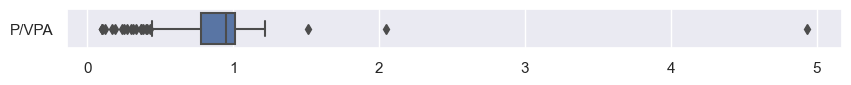

In [1545]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

<AxesSubplot: >

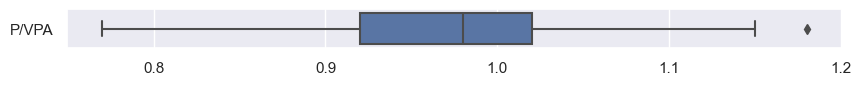

In [1546]:
df.drop(df.loc[df['P/VPA']>=1.2].index, inplace=True)
df.drop(df.loc[df['P/VPA']<=0.75].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["P/VPA"]], orient="h")

Dividend Yeld

<AxesSubplot: >

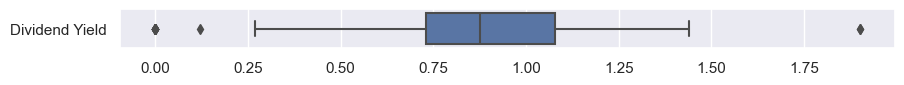

In [1547]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

<AxesSubplot: >

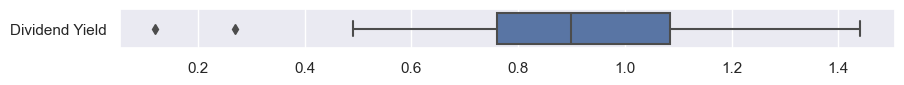

In [1548]:
df.drop(df.loc[df['Dividend Yield']>=1.8].index, inplace=True)
df.drop(df.loc[df['Dividend Yield']<=0.02].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Dividend Yield"]], orient="h")

VPA

<AxesSubplot: >

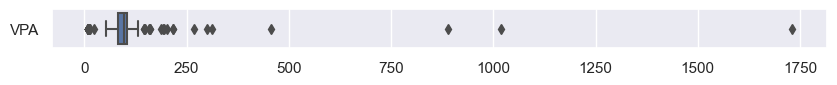

In [1549]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["VPA"]], orient="h")

<AxesSubplot: >

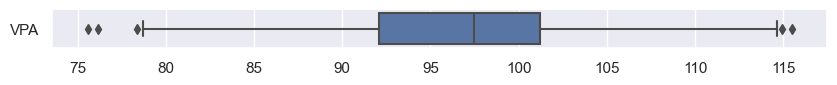

In [1550]:
df.drop(df.loc[df['VPA']>=120].index, inplace=True)
df.drop(df.loc[df['VPA']<=75].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["VPA"]], orient="h")

Preço Atual

<AxesSubplot: >

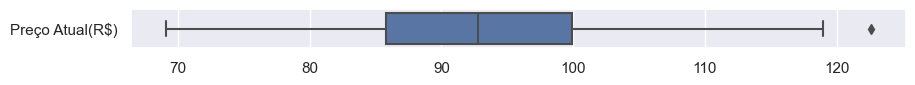

In [1551]:
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

<AxesSubplot: >

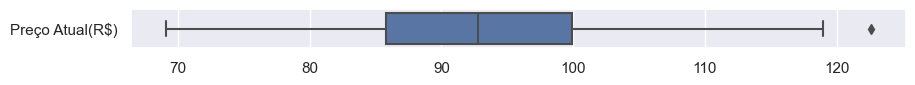

In [1552]:
df.drop(df.loc[df['Preço Atual(R$)']>=130.00].index, inplace=True)
sns.set(rc={"figure.figsize":(10, 0.5)})
sns.boxplot(data=df[["Preço Atual(R$)"]], orient="h")

In [1553]:
df.shape

(126, 28)

In [1554]:
num_estudos = df.shape[0]
print(f"O estudo segue com {num_estudos} fundos.")

O estudo segue com 126 fundos.


___

Analize dos fundos(melhorar descricao)

In [1555]:
df.head(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
1,ABCP11,TIJOLO,SHOPPINGS,72.01,49435.57,0.78,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,None,None,1
2,AFHI11,PAPÉIS,PAPÉIS,97.84,1622696.63,1.02,1.10,1.11,3.38,6.80,...,2.903880e+08,94.82,1.03,1.01,-0.94,0.06,5.00,None,None,0
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,84837.77,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0
7,ALZR11,HIBRIDO,MISTO,116.60,2801744.43,1.09,0.83,0.70,2.14,4.31,...,1.051986e+09,106.94,1.09,0.68,-0.03,0.65,7.26,None,None,13
14,BARI11,PAPÉIS,PAPÉIS,87.90,689363.17,0.90,0.90,1.01,3.21,6.57,...,4.500284e+08,99.63,0.88,0.90,-0.70,0.19,8.18,None,None,0


In [1556]:
df.sample(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
308,RVBI11,FOF,FUNDO DE FUNDOS,85.88,201244.73,0.99,0.75,0.85,2.70,5.82,...,1.244864e+08,83.87,1.02,0.89,-2.88,-2.01,5.11,None,None,0
295,RECX11,FOF,FUNDO DE FUNDOS,69.19,7999.73,0.89,0.60,0.85,2.70,5.90,...,1.677918e+07,78.36,0.88,0.77,-3.80,-3.06,-5.68,None,None,0
200,LASC11,TIJOLO,SHOPPINGS,101.90,893329.31,1.00,0.63,0.62,1.22,6.03,...,3.000340e+08,109.68,0.93,0.74,-0.24,0.50,2.30,None,None,2
214,MATV11,INDEFINIDO,INDEFINIDO,86.63,13027.43,0.92,0.60,0.73,3.11,4.87,...,3.992699e+07,92.09,0.94,0.87,-1.34,-0.49,-0.81,None,None,0
148,HGIC11,PAPÉIS,PAPÉIS,105.75,22707.52,0.90,1.00,0.94,3.03,4.98,...,5.405856e+07,114.02,0.93,0.96,-2.08,-1.14,17.05,None,None,0


In [1557]:
df.tail(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
370,VVPR11,HIBRIDO,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,...,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,None,None,6
376,XPCI11,PAPÉIS,PAPÉIS,87.75,2402174.57,0.92,1.00,1.15,3.29,6.78,...,8.257475e+08,93.63,0.94,0.64,-1.97,-1.34,10.11,None,None,0
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.46,453501.57,0.82,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,None,None,98
381,XPLG11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,114.91,3164905.83,1.02,0.78,0.68,2.08,4.39,...,3.064092e+09,114.49,1.00,0.65,0.19,0.84,11.47,None,None,19
382,XPML11,TIJOLO,SHOPPINGS,109.79,8769569.57,1.12,0.83,0.80,2.37,4.76,...,2.472954e+09,101.27,1.08,0.76,-0.66,0.10,6.56,None,None,12


os mais pagadores por tipo, os maiores dividendos, maior pagador, menor pagador


RENTABILIDADE DOS ULTIMOS 12 MESES

___

Geral

In [1558]:
df_teste = df[(df['P/VPA'] <= 1)]
df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]
df_teste2 = df_teste2.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
pd.Dataframe=df_teste2
df_teste2.head(10)


C:\Users\dougl\AppData\Local\Temp\ipykernel_19540\1765953071.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_teste2 = df_teste[(df['Dividend Yield'] >= 0.8)]


,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
180,JPPA11,PAPÉIS,PAPÉIS,99.13,302146.03,1.00,1.25,1.25,3.97,8.21,...,8.972954e+07,99.04,1.00,1.41,-0.73,0.67,11.76,None,None,0
290,RCFF11,FOF,FUNDO DE FUNDOS,85.00,43597.00,0.91,1.23,1.32,1.32,4.19,...,3.029723e+07,94.05,0.90,1.86,-0.06,1.80,1.80,None,None,0
310,RZAK11,PAPÉIS,PAPÉIS,92.12,5382921.07,0.98,1.20,1.26,3.97,7.68,...,8.200132e+08,92.64,0.99,1.62,-0.41,1.20,7.90,None,None,0
74,CPTR11,FIAGRO,INDEFINIDO,96.58,1945683.97,0.97,1.20,1.23,3.99,8.26,...,4.070996e+08,98.38,0.98,1.37,-0.31,1.06,2.50,None,None,0
135,HABT11,PAPÉIS,PAPÉIS,95.90,1285876.73,0.96,1.20,1.25,3.89,8.21,...,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,None,None,0
272,RBHY11,PAPÉIS,PAPÉIS,93.81,93515.73,1.00,1.20,1.27,3.83,7.70,...,1.774237e+08,94.54,0.99,1.27,-0.77,0.49,12.61,None,None,0
244,OUJP11,PAPÉIS,PAPÉIS,99.99,580434.17,1.01,1.20,1.18,3.66,7.60,...,3.210059e+08,99.94,1.00,1.20,-1.18,0.01,13.55,None,None,0
346,VCRA11,FIAGRO,INDEFINIDO,95.50,538047.53,0.98,1.19,1.23,3.82,7.38,...,4.713737e+08,102.61,0.93,1.16,0.22,1.38,2.87,None,None,0
193,KNCR11,PAPÉIS,PAPÉIS,98.75,11894551.63,0.98,1.15,1.16,3.64,6.93,...,5.759279e+09,100.66,0.98,1.09,-0.02,1.08,11.76,None,None,0
344,URPR11,PAPÉIS,PAPÉIS,97.44,2192370.67,0.97,1.13,1.12,3.85,8.00,...,1.169228e+09,99.33,0.98,1.12,-1.74,-0.64,22.93,None,None,0


In [1559]:
novo_df = df_teste2[['Setor','Fundos', 'Ultimo Dividendo(R$)', 'P/VPA', 'Preço Atual(R$)']]

In [1560]:
novo_df = novo_df.sort_values(by='Ultimo Dividendo(R$)', ascending=False)

In [1561]:
novo_df

,Setor,Fundos,Ultimo Dividendo(R$),P/VPA,Preço Atual(R$)
180,PAPÉIS,JPPA11,1.25,1.00,99.13
290,FUNDO DE FUNDOS,RCFF11,1.23,0.90,85.00
310,PAPÉIS,RZAK11,1.20,0.99,92.12
74,INDEFINIDO,CPTR11,1.20,0.98,96.58
135,PAPÉIS,HABT11,1.20,0.96,95.90
...,...,...,...,...,...
362,PAPÉIS,VOTS11,0.70,0.90,84.55
175,FUNDO DE FUNDOS,ITIT11,0.66,1.00,79.92
229,FUNDO DE FUNDOS,MORE11,0.62,0.91,76.17
295,FUNDO DE FUNDOS,RECX11,0.60,0.88,69.19


In [1562]:
novo_df.groupby(['Setor'])['Ultimo Dividendo(R$)'].count().reset_index().sort_values(by='Ultimo Dividendo(R$)', ascending=False)

,Setor,Ultimo Dividendo(R$)
7,PAPÉIS,31
2,FUNDO DE FUNDOS,10
4,INDEFINIDO,8
6,MISTO,4
5,LAJES CORPORATIVAS,3
3,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,2
0,AGÊNCIAS DE BANCOS,1
1,FUNDO DE DESENVOLVIMENTO,1
8,SHOPPINGS,1


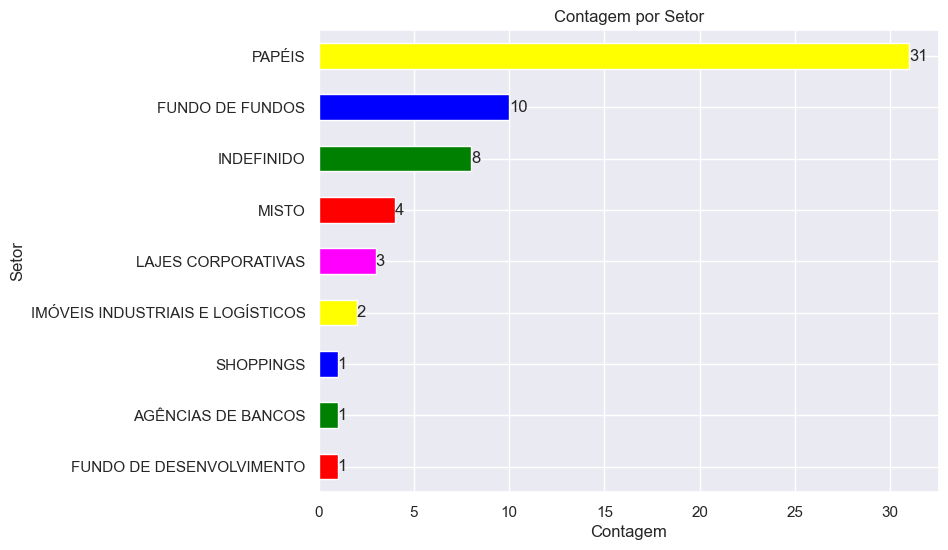

In [1563]:
contagem_setor = novo_df['Setor'].value_counts().sort_values(ascending=True)
cores = ['red', 'green', 'blue', 'yellow', 'magenta']
ax = contagem_setor.plot(kind='barh', figsize=(8, 6), color=cores)
plt.title('Contagem por Setor')
plt.xlabel('Contagem')
plt.ylabel('Setor')
for i, v in enumerate(contagem_setor):
    ax.text(v, i, str(v), ha='left', va='center')

plt.show()

melhorar esse grafico

In [1564]:
df_teste

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
1,ABCP11,TIJOLO,SHOPPINGS,72.01,49435.57,0.78,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,None,None,1
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,84837.77,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0
14,BARI11,PAPÉIS,PAPÉIS,87.90,689363.17,0.90,0.90,1.01,3.21,6.57,...,4.500284e+08,99.63,0.88,0.90,-0.70,0.19,8.18,None,None,0
16,BBFO11,FOF,FUNDO DE FUNDOS,75.50,275317.17,0.91,0.70,0.92,2.87,6.15,...,3.290045e+08,82.36,0.92,0.73,-4.19,-3.49,4.75,None,None,0
17,BBGO11,FIAGRO,INDEFINIDO,91.45,420775.63,0.84,1.01,1.08,4.73,8.61,...,3.925504e+08,98.01,0.93,1.04,0.08,1.12,9.31,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,VTLT11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,98.22,207378.73,0.97,0.88,0.88,2.73,5.66,...,2.138462e+08,102.98,0.95,0.81,0.05,0.86,8.91,None,None,1
370,VVPR11,HIBRIDO,MISTO,101.50,1249061.55,1.04,0.89,0.89,2.47,4.88,...,2.260322e+08,103.41,0.98,0.74,0.02,0.76,1.53,None,None,6
376,XPCI11,PAPÉIS,PAPÉIS,87.75,2402174.57,0.92,1.00,1.15,3.29,6.78,...,8.257475e+08,93.63,0.94,0.64,-1.97,-1.34,10.11,None,None,0
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.46,453501.57,0.82,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,None,None,98


In [1565]:
df_geral = df.sort_values(by='P/VPA')


In [1566]:
df_geral2 = df_geral.sort_values(by='Preço Atual(R$)', ascending=True)

In [1567]:
df_geral2

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
249,PATC11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,69.10,646274.50,0.92,0.34,0.49,3.24,5.98,...,2.619905e+08,79.10,0.87,0.35,-7.17,-6.84,-4.71,None,None,7
295,RECX11,FOF,FUNDO DE FUNDOS,69.19,7999.73,0.89,0.60,0.85,2.70,5.90,...,1.677918e+07,78.36,0.88,0.77,-3.80,-3.06,-5.68,None,None,0
1,ABCP11,TIJOLO,SHOPPINGS,72.01,49435.57,0.78,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,None,None,1
243,OUFF11,FOF,FUNDO DE FUNDOS,74.05,194362.37,0.95,0.72,1.00,3.15,6.55,...,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,None,None,3
21,BCFF11,FOF,FUNDO DE FUNDOS,75.00,2746872.07,0.99,0.56,0.74,2.32,4.92,...,1.915103e+09,75.57,0.99,0.74,-3.03,-2.31,1.30,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,ALZR11,HIBRIDO,MISTO,116.60,2801744.43,1.09,0.83,0.70,2.14,4.31,...,1.051986e+09,106.94,1.09,0.68,-0.03,0.65,7.26,None,None,13
108,FCFL11,TIJOLO,EDUCACIONAL,117.10,173759.17,1.01,0.79,0.69,2.17,4.46,...,4.037461e+08,104.80,1.12,0.73,0.00,0.73,5.64,None,None,1
357,VISC11,TIJOLO,SHOPPINGS,118.38,4073415.70,1.04,0.85,0.71,2.11,4.45,...,2.142724e+09,114.93,1.03,0.66,-0.04,0.62,5.92,None,None,20
211,LVBI11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,118.98,2100363.57,1.02,0.79,0.67,2.05,4.34,...,1.363471e+09,115.51,1.03,0.65,-0.03,0.62,4.47,None,None,8


___

Análise de Fundos de Investimento Imobiliário: Estratégias para Identificar Oportunidades de Investimento

Os Fundos de Investimento Imobiliário (FIIs) têm ganhado destaque no cenário financeiro como uma alternativa atrativa para investidores que buscam exposição ao mercado imobiliário sem a necessidade de aquisição direta de propriedades. No entanto, a variedade de opções disponíveis requer uma análise criteriosa para selecionar os melhores investimentos. Neste contexto, três parâmetros-chave podem ser considerados: o índice P/VP, o índice P/VPA e o dividend yield.

1. Índice P/VP (Preço/Valor Patrimonial)

O índice P/VP é uma métrica que compara o preço atual da cota do FII ao seu valor patrimonial por cota. Um P/VP abaixo de 1 indica que a cota está sendo negociada a um preço inferior ao seu valor patrimonial, o que pode ser um sinal de subvalorização. Isso pode indicar uma oportunidade interessante, pois sugere que os investidores estão comprando ativos imobiliários a um preço abaixo do seu valor intrínseco.

2. Índice P/VPA (Preço/Valor Patrimonial por Ação)

O índice P/VPA é uma variação do P/VP, mas leva em consideração o valor patrimonial por ação (VPA) ao invés da cota como um todo. Um P/VPA abaixo de 1 indica que a cota está sendo negociada a um preço inferior ao seu valor patrimonial por ação. Isso pode ser um sinal de que o mercado não está refletindo completamente o valor dos ativos imobiliários contidos no FII. Um baixo índice P/VPA pode sugerir uma margem de segurança e potencial de valorização.

3. Dividend Yield

O dividend yield é a relação entre os dividendos anuais distribuídos pelo FII e o preço atual da cota. Um alto dividend yield indica que o fundo está distribuindo uma parcela significativa dos seus ganhos aos investidores. No contexto dos FIIs, onde a distribuição de rendimentos é uma característica fundamental, um alto dividend yield pode ser uma indicação de fluxo de caixa estável e atraente para os investidores que buscam renda passiva.

Considerações Finais

A análise de fundos de investimento imobiliário baseada nos parâmetros P/VP, P/VPA e dividend yield pode ser uma abordagem útil para identificar oportunidades de investimento. No entanto, é importante lembrar que essas métricas devem ser avaliadas em conjunto com outras informações e fatores. Uma análise completa envolve também considerações sobre a qualidade dos ativos do FII, o histórico de desempenho, a gestão do fundo e as perspectivas do mercado imobiliário.

Além disso, o risco associado aos investimentos em FIIs não deve ser ignorado. A análise de risco, liquidez e objetivos financeiros individuais também desempenham um papel crucial na tomada de decisões de investimento. Portanto, é recomendável que os investidores busquem aconselhamento financeiro profissional e realizem pesquisas aprofundadas antes de tomar decisões de investimento em Fundos de Investimento Imobiliário.






___

In [1568]:
df["Tipo"].value_counts()

PAPÉIS                      47
TIJOLO                      36
FOF                         21
FIAGRO                       9
HIBRIDO                      6
INDEFINIDO                   4
FUNDO DE DESENVOLVIMENTO     3
Name: Tipo, dtype: int64

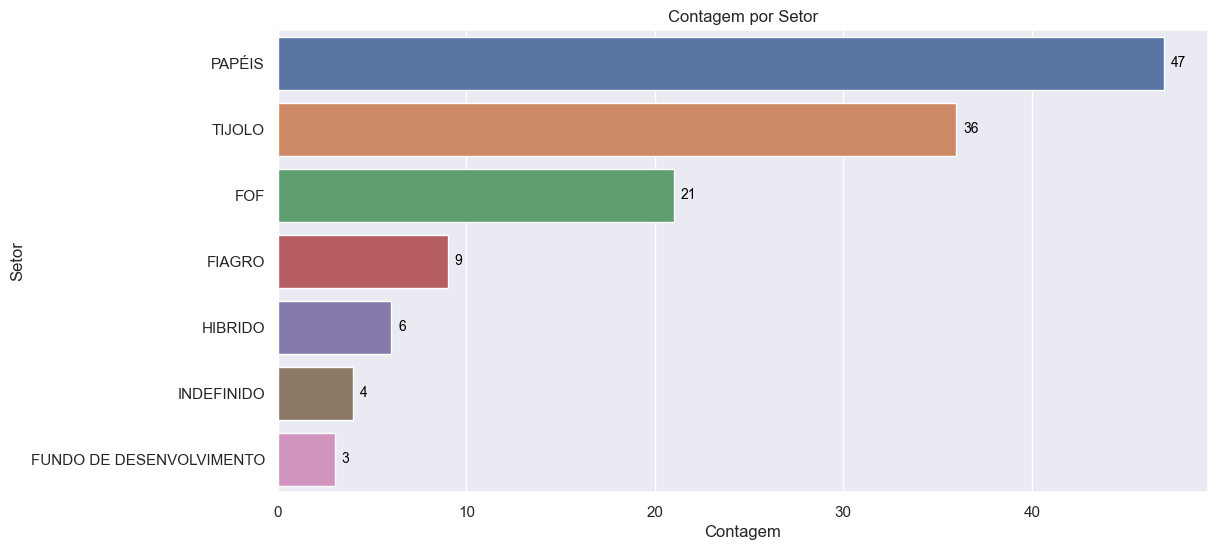

In [1569]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='Tipo', data=df, order=df['Tipo'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Contagem')
plt.ylabel('Setor')
plt.title('Contagem por Setor')
plt.show()


___

Setor: Fundo de Desenvolvimento

In [1570]:
df_f_desenvolvimento = df[(df['Tipo'] == 'FUNDO DE DESENVOLVIMENTO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_desenvolvimento = df_f_desenvolvimento.sort_values(by='Ultimo Dividendo(R$)', ascending=False)
df_f_desenvolvimento.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
221,MFII11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,94.8,486041.2,0.94,1.07,1.12,3.46,7.06,...,4.240530e+08,99.09,0.96,1.12,-1.83,-0.73,2.53,None,None,8
249,PATC11,FUNDO DE DESENVOLVIMENTO,FUNDO DE DESENVOLVIMENTO,69.1,646274.5,0.92,0.34,0.49,3.24,5.98,...,2.619905e+08,79.10,0.87,0.35,-7.17,-6.84,-4.71,None,None,7


In [1571]:
fundo_maior_dividendo = df_f_desenvolvimento.nlargest(1, 'Dividend Yield')
ticker_f_desenvolvimento = fundo_maior_dividendo['Fundos'].values[0]
ticker_f_desenvolvimento_completo = ticker_f_desenvolvimento + '.SA'


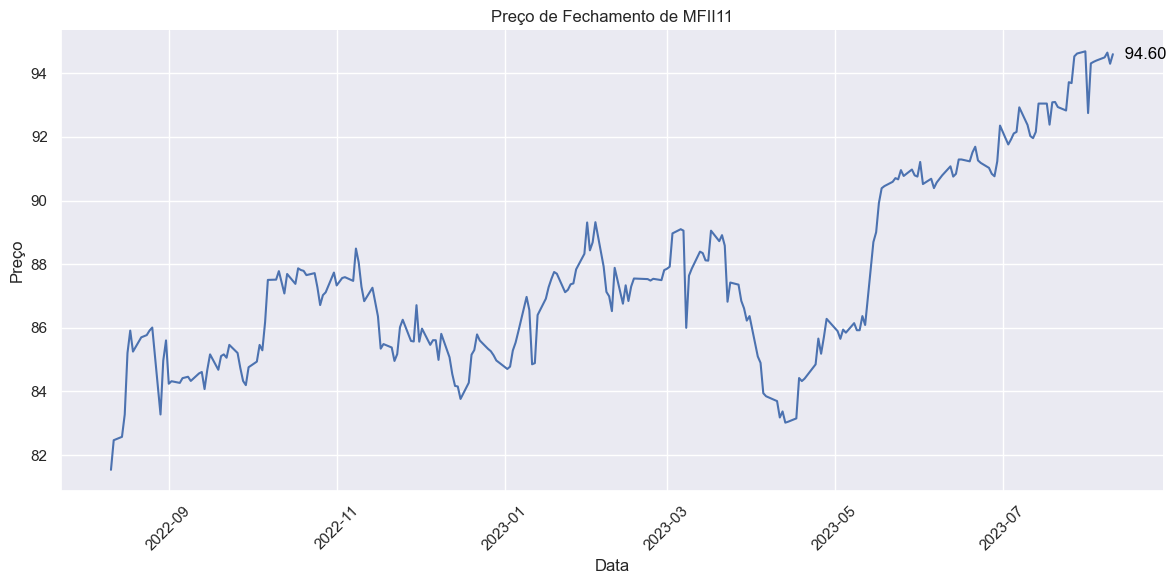

In [1572]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')


ticker_f_desenvolvimento_completo = ticker_f_desenvolvimento + '.SA'
fund = yf.Ticker(ticker_f_desenvolvimento_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_desenvolvimento}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


precisa plotar grafico com distribuição nos ultimos 12 meses

ou encontrar a informação em outro lugar reerente aos 12 meses e plotar, não colar uma snapshot

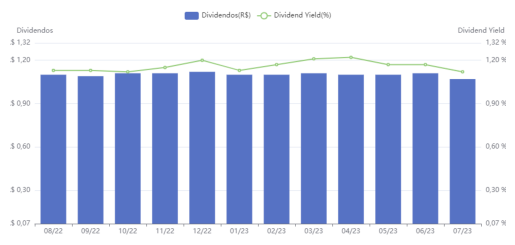

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Inicializar o driver do Selenium (certifique-se de ter o ChromeDriver ou o WebDriver apropriado instalado)
driver = webdriver.Chrome()

# Abrir a URL
url = "https://www.fundsexplorer.com.br/funds/mfii11"
driver.get(url)

# Aguardar até que a página esteja completamente carregada
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.ID, 'dividends-chart')))

# Localizar o elemento do canvas usando o XPath
canvas_element = driver.find_element(By.XPATH, '//*[@id="dividends-chart"]')

# Aguardar até que o elemento canvas esteja presente
wait.until(EC.visibility_of(canvas_element))

# Tirar um screenshot do elemento canvas
canvas_screenshot = canvas_element.screenshot_as_png
canvas_image = Image.open(BytesIO(canvas_screenshot))

# Mostrar a imagem usando o Matplotlib
plt.imshow(canvas_image)
plt.axis('off')
plt.show()

# Fechar o navegador
driver.quit()


//*[@id="dividends-chart"]/div[1]/canvas

___

Setor: Indefinido

In [1573]:
df_f_indefinido = df[(df['Tipo'] == 'INDEFINIDO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_indefinido = df_f_indefinido.sort_values(by='Dividend Yield', ascending=False)
df_f_indefinido.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
83,CXCI11,INDEFINIDO,INDEFINIDO,88.75,81632.83,0.92,0.85,0.95,3.00,6.26,...,1.986256e+08,94.33,0.94,0.88,-4.41,-3.57,2.57,None,None,0
185,KCRE11,INDEFINIDO,INDEFINIDO,97.40,395465.50,0.93,0.90,0.92,3.56,7.10,...,3.760046e+08,98.96,0.98,0.52,-1.96,-1.46,1.56,None,None,0
173,IRIM11,INDEFINIDO,INDEFINIDO,93.01,59994.33,0.96,0.86,0.90,3.23,6.61,...,1.842159e+08,97.23,0.96,0.74,-1.35,-0.62,2.72,None,None,0
214,MATV11,INDEFINIDO,INDEFINIDO,86.63,13027.43,0.92,0.60,0.73,3.11,4.87,...,3.992699e+07,92.09,0.94,0.87,-1.34,-0.49,-0.81,None,None,0


In [1574]:
indefinido_maior_dividendo = df_f_indefinido.nlargest(1, 'Dividend Yield')
ticker_f_indefinido = indefinido_maior_dividendo['Fundos'].values[0]
ticker_f_indefinido_completo = ticker_f_indefinido + '.SA'

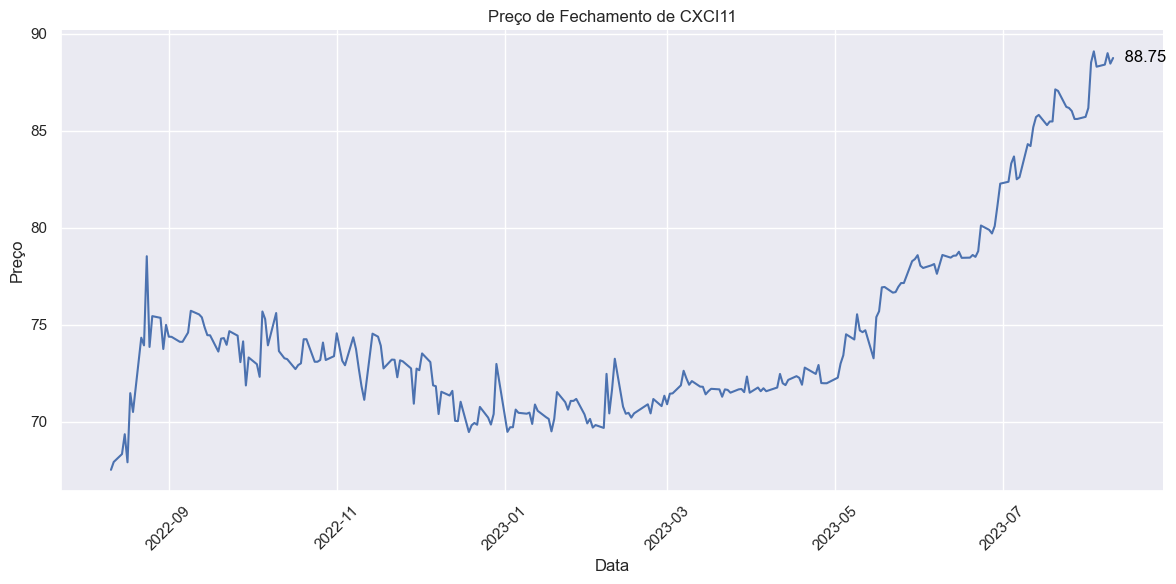

In [1575]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_indefinido_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_indefinido}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

Setor: Hibrido

In [1576]:
df_f_hibrido = df[(df['Tipo'] == 'HIBRIDO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_hibrido = df_f_hibrido.sort_values(by='Dividend Yield', ascending=False)
df_f_hibrido.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
246,OURE11,HIBRIDO,MISTO,85.50,137371.43,0.93,1.00,1.19,3.69,7.66,...,9.920371e+07,92.02,0.93,1.14,-2.16,-1.04,11.12,None,None,4
103,EVBI11,HIBRIDO,MISTO,97.50,197535.47,0.98,0.86,0.90,2.44,4.84,...,2.123205e+08,100.21,0.97,0.75,-0.71,0.03,7.70,None,None,8
312,RZTR11,HIBRIDO,MISTO,95.25,2104592.93,0.98,0.85,0.90,2.77,5.79,...,1.074906e+09,97.31,0.98,1.28,0.00,1.29,10.37,None,None,16


In [1577]:
hibrido_maior_dividendo = df_f_hibrido.nlargest(1, 'Dividend Yield')
ticker_f_hibrido = hibrido_maior_dividendo['Fundos'].values[0]
ticker_f_hibrido_completo = ticker_f_hibrido + '.SA'

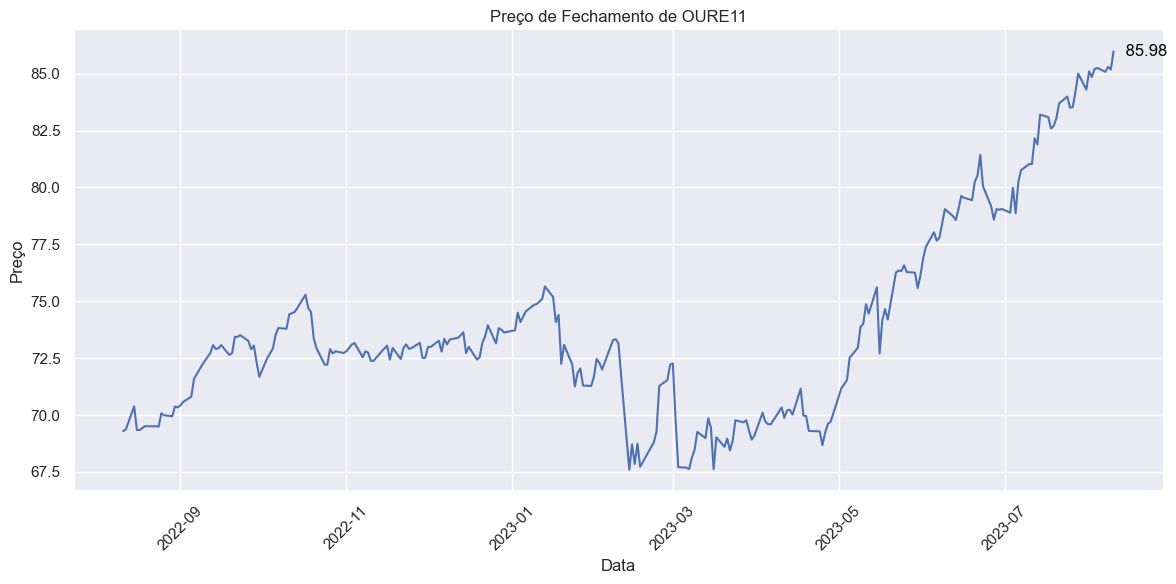

In [1578]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_hibrido_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_hibrido}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

Setor: Fiagro

In [1579]:
df_f_fiagro = df[(df['Tipo'] == 'FIAGRO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_fiagro = df_f_fiagro.sort_values(by='Dividend Yield', ascending=False)
df_f_fiagro.head(10)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
74,CPTR11,FIAGRO,INDEFINIDO,96.58,1945683.97,0.97,1.20,1.23,3.99,8.26,...,4.070996e+08,98.38,0.98,1.37,-0.31,1.06,2.50,None,None,0
252,PLCA11,FIAGRO,INDEFINIDO,93.22,26127.30,0.88,1.13,1.23,3.77,7.44,...,5.290857e+07,94.99,0.98,1.18,0.00,0.00,0.00,None,None,0
346,VCRA11,FIAGRO,INDEFINIDO,95.50,538047.53,0.98,1.19,1.23,3.82,7.38,...,4.713737e+08,102.61,0.93,1.16,0.22,1.38,2.87,None,None,0
126,GCRA11,FIAGRO,INDEFINIDO,89.60,532294.53,0.95,1.10,1.20,3.64,7.66,...,1.716086e+08,98.01,0.91,1.31,0.01,1.32,14.22,None,None,0
17,BBGO11,FIAGRO,INDEFINIDO,91.45,420775.63,0.84,1.01,1.08,4.73,8.61,...,3.925504e+08,98.01,0.93,1.04,0.08,1.12,9.31,None,None,0


Precisa criar um criterio de desempate

In [1580]:
fiagro_maior_dividendo = df_f_fiagro.nlargest(1, 'Dividend Yield')
ticker_f_fiagro = fiagro_maior_dividendo['Fundos'].values[0]
ticker_f_fiagro_completo = ticker_f_fiagro + '.SA'

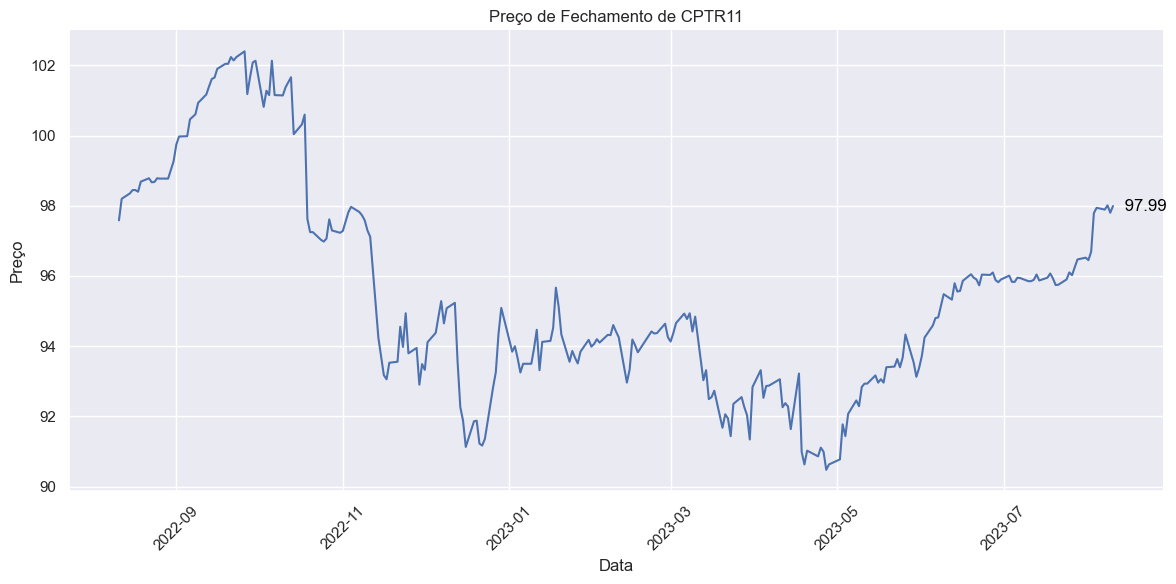

In [1581]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_fiagro_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_fiagro}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

Setor: FOF

In [1582]:
df_f_fof = df[(df['Tipo'] == 'FOF') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_fof = df_f_fof.sort_values(by='Dividend Yield', ascending=False)
df_f_fof.head(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
290,RCFF11,FOF,FUNDO DE FUNDOS,85.00,43597.00,0.91,1.23,1.32,1.32,4.19,...,3.029723e+07,94.05,0.90,1.86,-0.06,1.80,1.80,None,None,0
243,OUFF11,FOF,FUNDO DE FUNDOS,74.05,194362.37,0.95,0.72,1.00,3.15,6.55,...,1.411464e+08,76.15,0.97,0.92,-5.19,-4.32,5.61,None,None,3
298,RFOF11,FOF,FUNDO DE FUNDOS,80.70,70394.00,0.95,0.75,0.94,2.84,5.93,...,9.024635e+07,80.55,1.00,0.91,-6.07,-5.22,1.08,None,None,0
94,DVFF11,FOF,FUNDO DE FUNDOS,84.00,101997.03,0.88,0.80,0.93,2.85,6.01,...,1.050454e+08,91.56,0.92,0.93,-4.01,-3.12,8.77,None,None,0
6,ALZM11,FOF,FUNDO DE FUNDOS,92.50,84837.77,1.00,0.85,0.92,2.74,5.85,...,6.390786e+07,100.50,0.92,1.07,2.33,3.43,8.23,None,None,0


In [1583]:
fof_maior_dividendo = df_f_fof.nlargest(1, 'Dividend Yield')
ticker_f_fof = fof_maior_dividendo['Fundos'].values[0]
ticker_f_fof_completo = ticker_f_fof + '.SA'

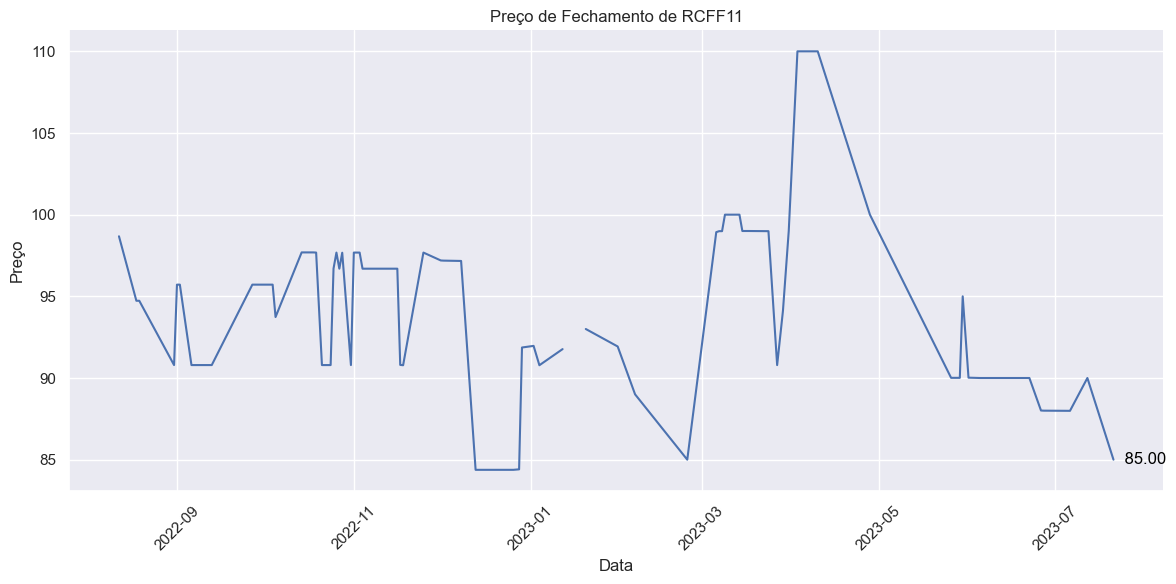

In [1584]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_fof_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_fof}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

Setor Papéis

In [1585]:
df_f_papeis = df[(df['Tipo'] == 'PAPÉIS') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_papeis = df_f_papeis.sort_values(by='Dividend Yield', ascending=False)
df_f_papeis.head(5)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
168,IBCR11,PAPÉIS,PAPÉIS,77.23,187649.13,0.80,0.99,1.27,3.52,7.14,...,9.263484e+07,95.51,0.81,0.84,-0.91,-0.08,9.49,None,None,0
272,RBHY11,PAPÉIS,PAPÉIS,93.81,93515.73,1.00,1.20,1.27,3.83,7.70,...,1.774237e+08,94.54,0.99,1.27,-0.77,0.49,12.61,None,None,0
138,HCHG11,PAPÉIS,PAPÉIS,80.16,55473.03,0.82,1.05,1.27,3.78,7.31,...,1.171482e+08,100.07,0.80,1.00,-0.38,0.61,13.16,None,None,0
310,RZAK11,PAPÉIS,PAPÉIS,92.12,5382921.07,0.98,1.20,1.26,3.97,7.68,...,8.200132e+08,92.64,0.99,1.62,-0.41,1.20,7.90,None,None,0
135,HABT11,PAPÉIS,PAPÉIS,95.90,1285876.73,0.96,1.20,1.25,3.89,8.21,...,8.101703e+08,99.80,0.96,0.92,0.14,1.06,15.75,None,None,0


In [1586]:
papeis_maior_dividendo = df_f_papeis.nlargest(1, 'Dividend Yield')
ticker_f_papeis = papeis_maior_dividendo['Fundos'].values[0]
ticker_f_papeis_completo = ticker_f_fof + '.SA'

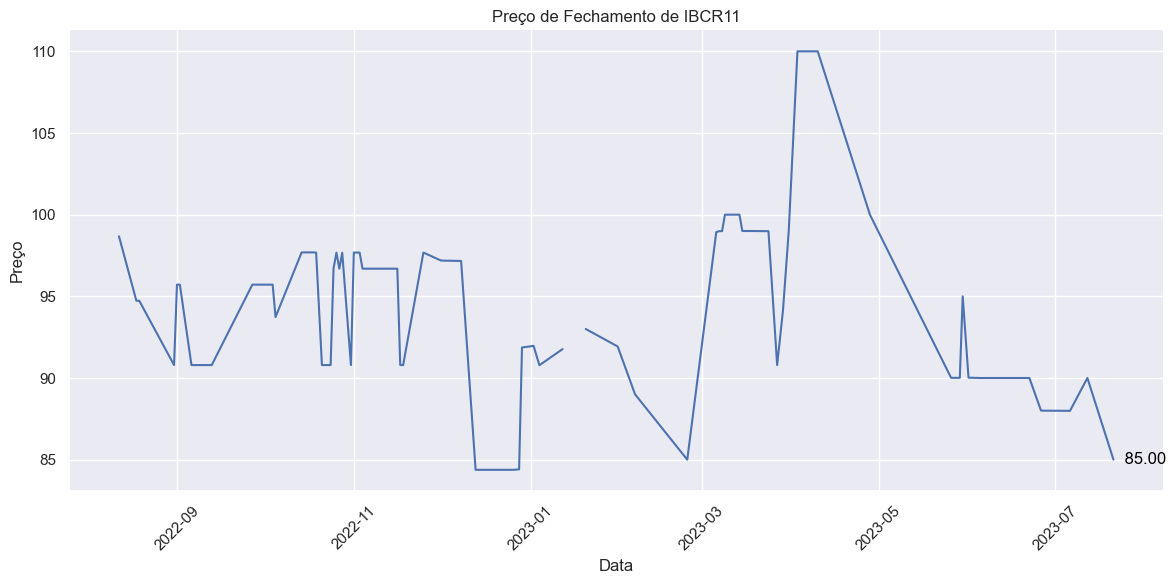

In [1587]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_papeis_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_papeis}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

Setor: Tijolo

In [1588]:
df_f_tijolo = df[(df['Tipo'] == 'TIJOLO') & (df['P/VP'] <= 1)  & (df['P/VPA'] <= 1)]
df_f_tijolo = df_f_tijolo.sort_values(by='Dividend Yield', ascending=False)


In [1589]:
df_f_tijolo['Setor'].value_counts()

IMÓVEIS INDUSTRIAIS E LOGÍSTICOS    10
LAJES CORPORATIVAS                   7
SHOPPINGS                            4
AGÊNCIAS DE BANCOS                   1
Name: Setor, dtype: int64

<AxesSubplot: ylabel='Setor'>

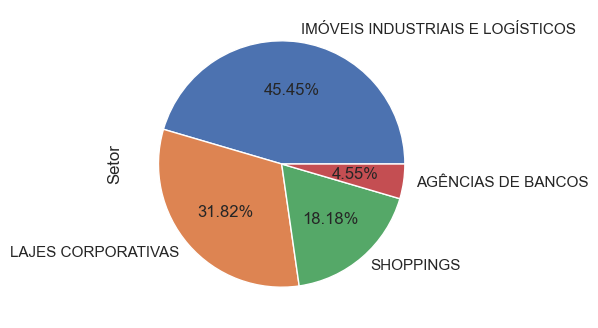

In [1590]:
plt.figure(figsize=(4,4))
df_f_tijolo["Setor"].value_counts().plot(kind="pie", autopct="%.2f%%")

IMÓVEIS INDUSTRIAIS E LOGÍSTICOS

In [1591]:
df_f_tijolo_IIL = df_f_tijolo[(df_f_tijolo['Setor']=='IMÓVEIS INDUSTRIAIS E LOGÍSTICOS')]
df_f_tijolo_IIL.head(3)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
367,VTLT11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,98.22,207378.73,0.97,0.88,0.88,2.73,5.66,...,2.138462e+08,102.98,0.95,0.81,0.05,0.86,8.91,None,None,1
250,PATL11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,75.12,719222.83,0.76,0.60,0.82,2.44,5.26,...,4.915601e+08,98.01,0.77,0.59,-0.10,0.49,6.74,None,None,5
380,XPIN11,TIJOLO,IMÓVEIS INDUSTRIAIS E LOGÍSTICOS,83.46,453501.57,0.82,0.65,0.78,2.38,5.06,...,7.301584e+08,103.81,0.80,0.63,-1.37,-0.75,0.75,None,None,98


In [1592]:

df_f_tijolo_IIL_maior_dividendo = df_f_tijolo_IIL.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_IIL = df_f_tijolo_IIL_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_IIL_completo = ticker_f_df_f_tijolo_IIL + '.SA'

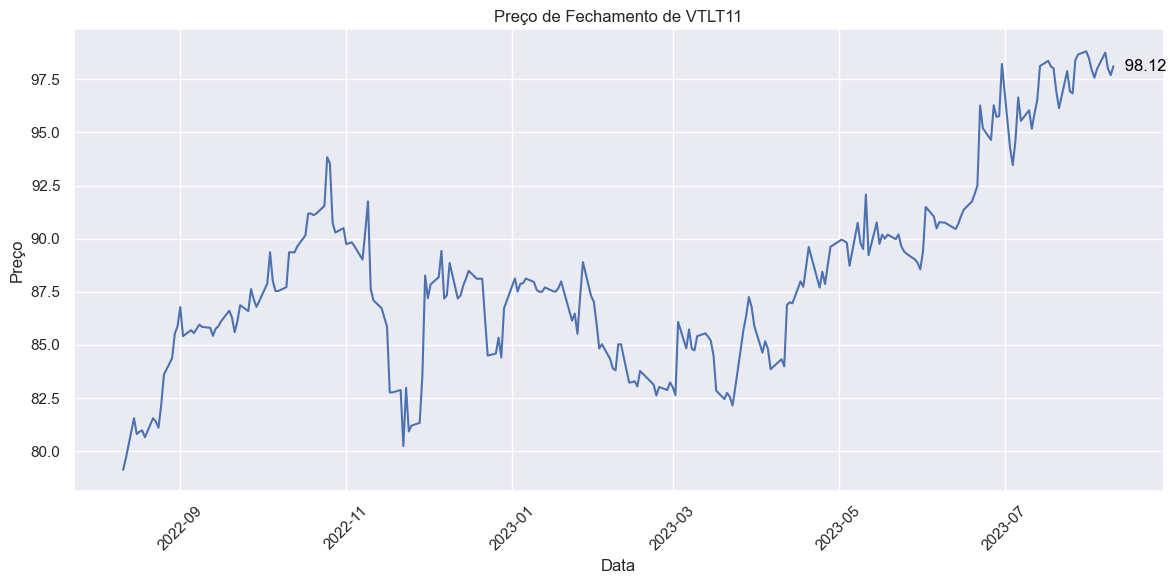

In [1593]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_IIL_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_IIL}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

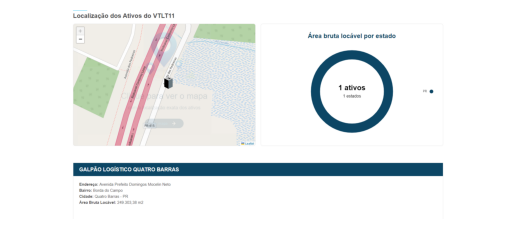

In [11]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Inicializar o driver do Selenium (certifique-se de ter o ChromeDriver ou o WebDriver apropriado instalado)
driver = webdriver.Chrome()

# Abrir a URL
url = "https://www.fundsexplorer.com.br/funds/vtlt11"
driver.get(url)

# Aguardar até que a página esteja completamente carregada
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.ID, 'dividends-chart')))

# Localizar o elemento do canvas usando o XPath
canvas_element = driver.find_element(By.XPATH, '//*[@id="carbon_fields_fiis_properties-2"]')

# Aguardar até que o elemento canvas esteja presente
wait.until(EC.visibility_of(canvas_element))

# Tirar um screenshot do elemento canvas
canvas_screenshot = canvas_element.screenshot_as_png
canvas_image = Image.open(BytesIO(canvas_screenshot))

# Mostrar a imagem usando o Matplotlib
plt.imshow(canvas_image)
plt.axis('off')
plt.show()

# Fechar o navegador
driver.quit()

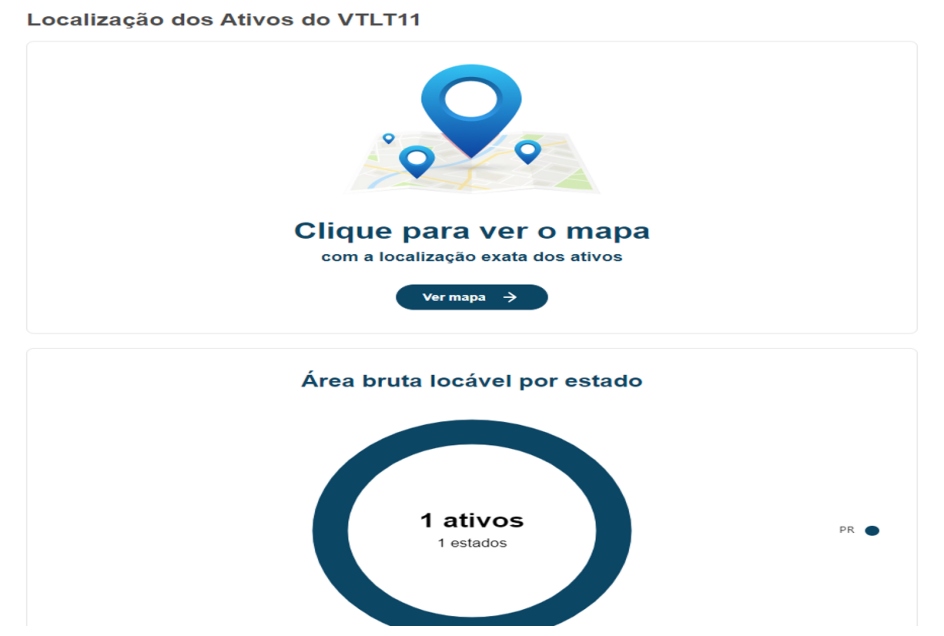

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Inicializar o driver do Selenium (certifique-se de ter o ChromeDriver ou o WebDriver apropriado instalado)
driver = webdriver.Chrome()

# Abrir a URL
url = "https://www.fundsexplorer.com.br/funds/vtlt11"
driver.get(url)

# Aguardar até que a página esteja completamente carregada
wait = WebDriverWait(driver, 20)
wait.until(EC.presence_of_element_located((By.ID, 'dividends-chart')))

# Localizar o elemento do canvas usando o XPath
canvas_element = driver.find_element(By.XPATH, '//*[@id="carbon_fields_fiis_properties-2"]/div')

# Aguardar até que o elemento canvas esteja presente
wait.until(EC.visibility_of(canvas_element))

# Tirar um screenshot do elemento canvas
canvas_screenshot = canvas_element.screenshot_as_png
canvas_image = Image.open(BytesIO(canvas_screenshot))

# Tamanho desejado da imagem (largura x altura)
desired_image_size = (1200, 800)

# Redimensionar a imagem para o tamanho desejado
resized_image = canvas_image.resize(desired_image_size)

# Mostrar a imagem redimensionada usando o Matplotlib
plt.figure(figsize=(12, 8))  # Tamanho da figura do Matplotlib
plt.imshow(resized_image)
plt.axis('off')
plt.show()

# Fechar o navegador
driver.quit()


In [1594]:
url_IIL= 'https://www.fundsexplorer.com.br/mapa-fiis/{}'.format(ticker_f_df_f_tijolo_IIL)
#url_IIL= 'https://www.fundsexplorer.com.br/mapa-fiis'


In [1595]:
url_IIL

'https://www.fundsexplorer.com.br/mapa-fiis/VTLT11'

In [23]:
navegador = webdriver.Chrome(service=servico)
navegador.get(url_IIL)
navegador.find_element('xpath', '//*[@id="search_list_input"]').click()
navegador.find_element('xpath', '//*[@id="search_list_input"]').send_keys(ticker_f_df_f_tijolo_IIL)
navegador.find_element('xpath', '//*[@id="search_list_container"]/li[424]').click()






NameError: name 'servico' is not defined

LAJES CORPORATIVAS

In [1597]:
df_f_tijolo_LC = df_f_tijolo[(df_f_tijolo['Setor']=='LAJES CORPORATIVAS')]
df_f_tijolo_LC.head(3)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
133,GTWR11,TIJOLO,LAJES CORPORATIVAS,83.40,924872.40,0.87,0.79,0.94,2.91,6.02,...,1.140707e+09,98.05,0.85,0.75,0.03,0.79,8.09,None,None,3
84,CXCO11,TIJOLO,LAJES CORPORATIVAS,81.35,205660.00,0.83,0.74,0.87,3.52,6.69,...,3.887611e+08,96.60,0.84,0.75,0.03,0.77,8.83,None,None,10
107,FATN11,TIJOLO,LAJES CORPORATIVAS,94.74,234142.93,0.95,0.84,0.86,2.59,5.14,...,1.261779e+08,101.40,0.93,0.79,0.37,1.16,7.01,None,None,29


In [1598]:
df_f_tijolo_LC_maior_dividendo = df_f_tijolo_LC.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_LC = df_f_tijolo_LC_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_LC_completo = ticker_f_df_f_tijolo_LC + '.SA'

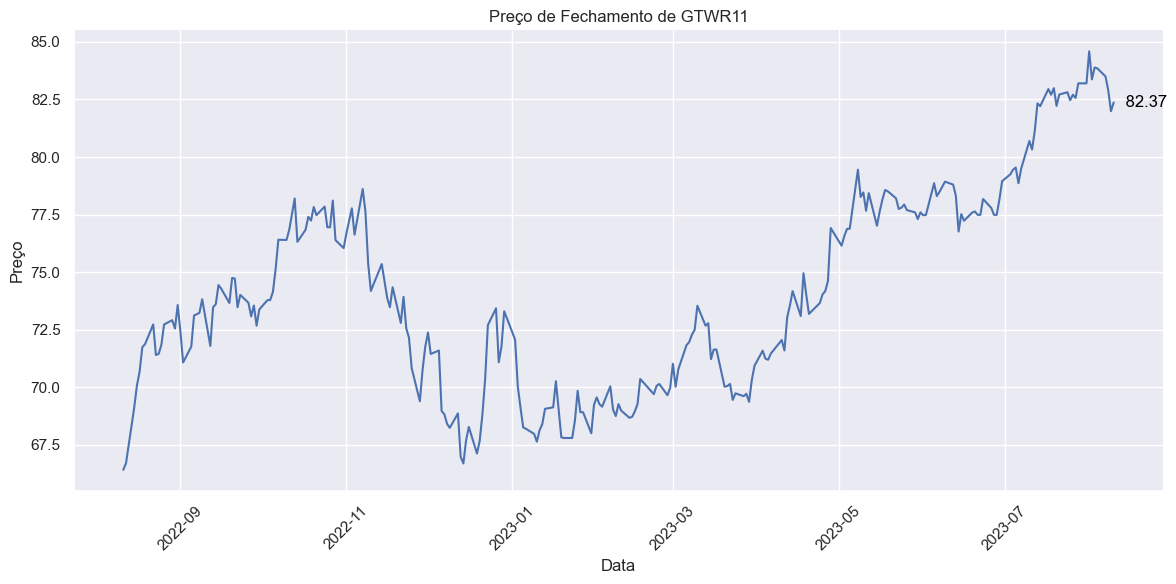

In [1599]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_LC_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_LC}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

SHOPPING

In [1600]:
df_f_tijolo_SH = df_f_tijolo[(df_f_tijolo['Setor']=='SHOPPINGS')]
df_f_tijolo_SH.head(3)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
365,VSHO11,TIJOLO,SHOPPINGS,79.75,136588.10,0.78,0.72,0.91,2.86,6.00,...,2.128388e+08,98.91,0.81,0.69,0.13,0.82,3.57,None,None,3
1,ABCP11,TIJOLO,SHOPPINGS,72.01,49435.57,0.78,0.50,0.70,2.12,4.39,...,4.321627e+08,91.82,0.78,0.65,-0.18,0.47,7.12,None,None,1
156,HPDP11,TIJOLO,SHOPPINGS,86.90,2602.89,0.97,0.53,0.64,2.69,3.99,...,2.603080e+08,95.00,0.91,0.53,0.14,0.67,5.81,None,None,1


In [1601]:
df_f_tijolo_SH_maior_dividendo = df_f_tijolo_SH.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_SH = df_f_tijolo_SH_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_SH_completo = ticker_f_df_f_tijolo_SH + '.SA'

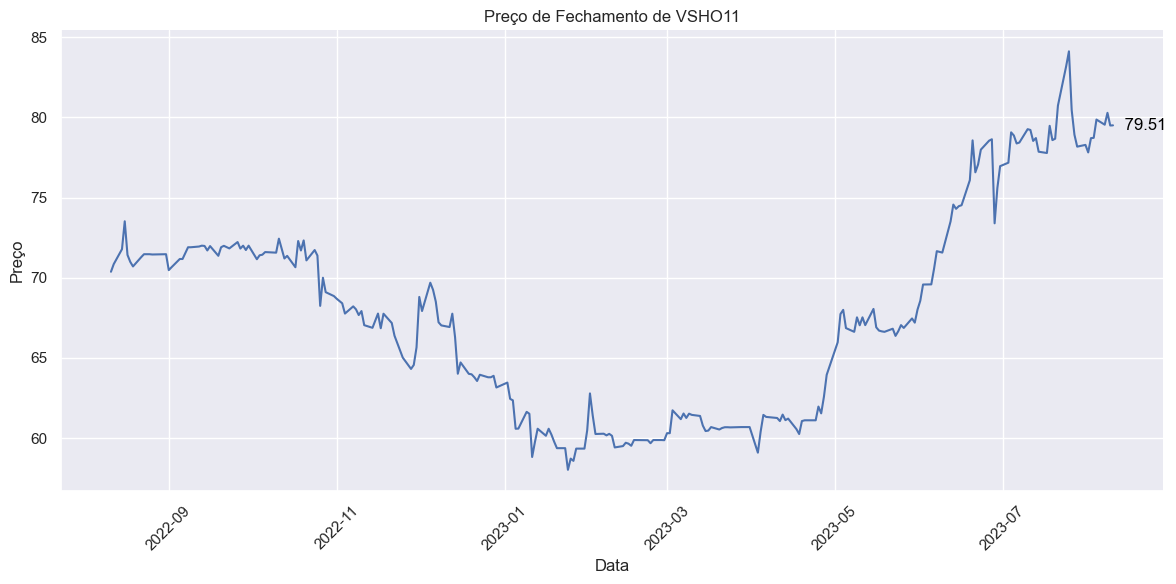

In [1602]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_SH_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_SH}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

HOTEIS

In [1603]:
df_f_tijolo_HT = df_f_tijolo[(df_f_tijolo['Setor']=='HOTÉIS')]
df_f_tijolo_HT.head(3)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos


In [1604]:
df_f_tijolo_HT_maior_dividendo = df_f_tijolo_HT.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_HT = df_f_tijolo_HT_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_HT_completo = ticker_f_df_f_tijolo_HT + '.SA'

IndexError: index 0 is out of bounds for axis 0 with size 0

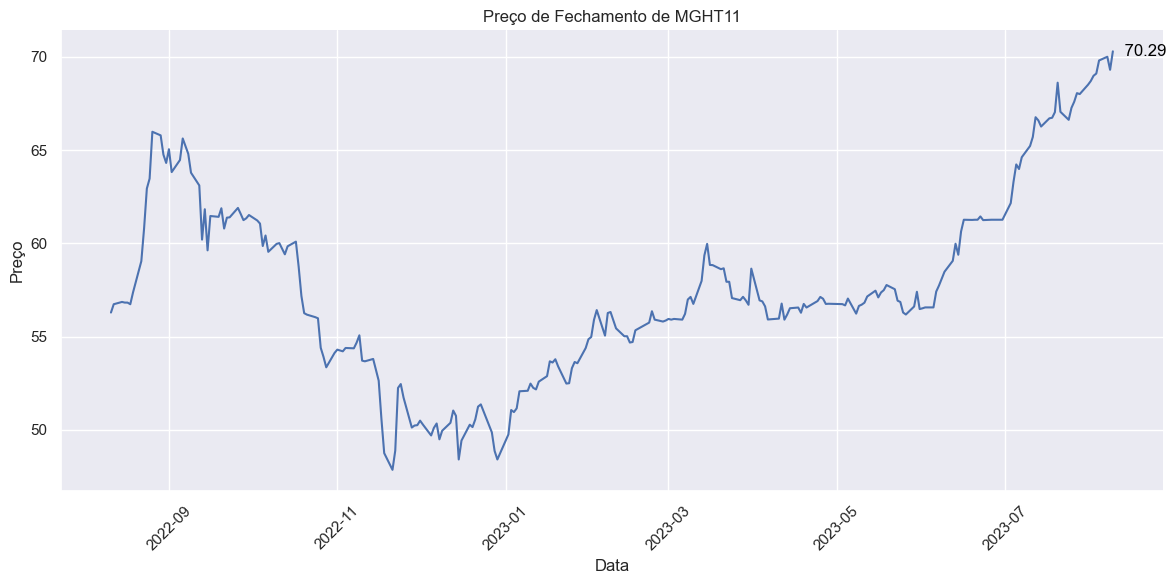

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_HT_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_HT}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

AGÊNCIAS DE BANCOS

In [ ]:
df_f_tijolo_AB = df_f_tijolo[(df_f_tijolo['Setor']=='HOTÉIS')]
df_f_tijolo_AB.head(3)

,Fundos,Tipo,Setor,Preço Atual(R$),Liquidez Diária(R$),P/VP,Ultimo Dividendo(R$),Dividend Yield,DY (3M) Acumulado,DY(6M) Acumulado,...,Patrimônio Líquido,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Vacancia Física,Vacancia Financeira,Quantidade de Ativos
224,MGHT11,TIJOLO,HOTÉIS,69.0,130530.55,0.79,0.8,1.18,3.83,7.83,...,1.145608e+08,85.61,0.81,0.76,-0.45,0.3,-6.08,None,None,1


In [ ]:
df_f_tijolo_AB_maior_dividendo = df_f_tijolo_AB.nlargest(1, 'Dividend Yield')
ticker_f_df_f_tijolo_AB = df_f_tijolo_AB_maior_dividendo['Fundos'].values[0]
ticker_f_df_f_tijolo_AB_completo = ticker_f_df_f_tijolo_AB + '.SA'

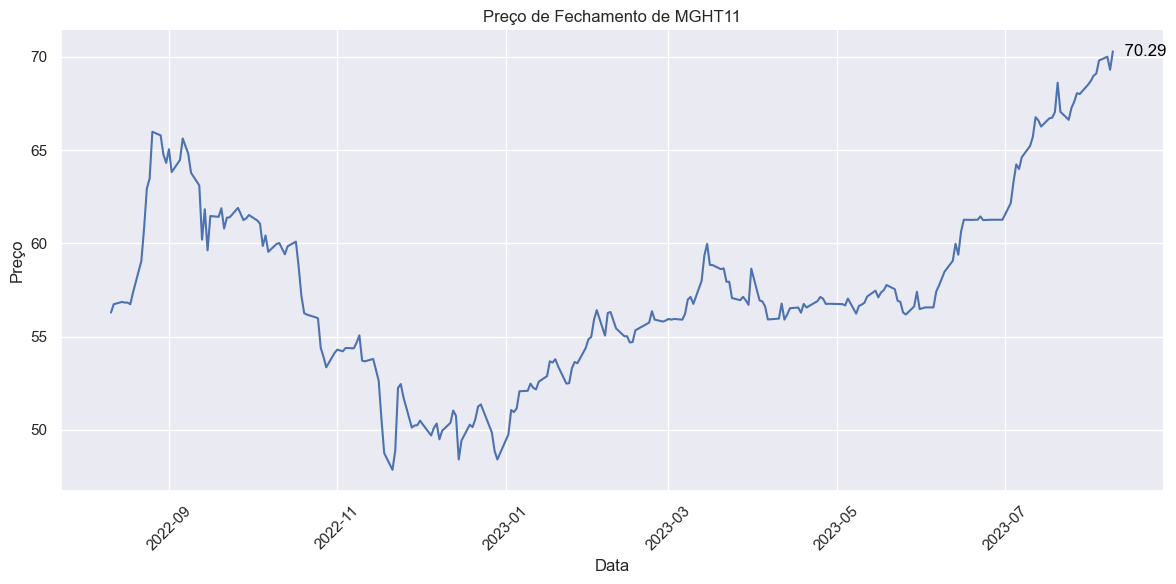

In [ ]:
sns.set_theme(style="darkgrid")
data_atual = datetime.date.today()
um_ano_atras = data_atual - datetime.timedelta(days=365)
start_date = um_ano_atras.strftime('%Y-%m-%d')
end_date = data_atual.strftime('%Y-%m-%d')



fund = yf.Ticker(ticker_f_df_f_tijolo_AB_completo)
historical_data = fund.history(start=start_date, end=end_date)
preco_atual = historical_data.iloc[-1]['Close']

plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], marker='', linestyle='-', color='b', label='Preço de Fechamento')

plt.annotate(f' {preco_atual:.2f}', xy=(historical_data.index[-1], preco_atual),
             xytext=(5, 0), textcoords='offset points', va='center', color='black')

plt.title(f"Preço de Fechamento de {ticker_f_df_f_tijolo_AB}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

___

___


no acima precisa colocar a cotacao nos ultimo ano, mes e 12 meses


https://www.clubefii.com.br/fiis/RZTR11

In [ ]:
"C:\Users\dougl\OneDrive\Imagens\fiis teste de imagem.jpg"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2754070979.py, line 1)

precisa gerar um grafico adicional ,grafico de distribuicão dos ultimos 12 meses

___